In [1]:
# Import SQL Alchemy engine
from sqlalchemy import create_engine

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_education = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [4]:
# Filling n/a dataset first. Used from the Module 15-3 Data Cleaning 2

df_education_2 = df_education.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    df_education_2.loc[:, col] = df_education_2.loc[:, col].fillna(df_education_2.loc[:, col].mean())
    print(col)

# Dropping n/a
df_education_2.dropna(inplace=True)

ENROLL
TOTAL_REVENUE
FEDERAL_REVENUE
STATE_REVENUE
LOCAL_REVENUE
TOTAL_EXPENDITURE
INSTRUCTION_EXPENDITURE
SUPPORT_SERVICES_EXPENDITURE
OTHER_EXPENDITURE
CAPITAL_OUTLAY_EXPENDITURE
GRADES_PK_G
GRADES_KG_G
GRADES_4_G
GRADES_8_G
GRADES_12_G
GRADES_1_8_G
GRADES_9_12_G
GRADES_ALL_G


In [5]:
df_education_2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,474.000000,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,4.740000e+02,...,474.000000,474.000000,474.000000,4.740000e+02,4.740000e+02,4.740000e+02,474.000000,474.000000,474.000000,474.000000
mean,2008.305907,9.383567e+05,1.022581e+07,9.137270e+05,4.734100e+06,4.577980e+06,1.033058e+07,5.339623e+06,3.018278e+06,4.733010e+05,...,71018.842384,71451.242453,62607.086794,5.721117e+05,2.793603e+05,8.665671e+05,236.541353,279.511266,219.305086,263.772645
std,6.096588,1.049378e+06,1.228783e+07,1.245154e+06,5.778345e+06,5.710645e+06,1.251551e+07,6.563781e+06,3.494171e+06,5.487766e+05,...,80973.543927,80609.957981,72079.478548,6.500868e+05,3.190865e+05,9.667211e+05,9.159956,9.695064,7.698038,6.834157
min,1992.000000,4.417900e+04,6.452330e+05,4.100700e+04,0.000000e+00,2.853100e+04,6.387840e+05,3.182600e+05,1.949150e+05,2.191000e+04,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,178.557612,236.379102
25%,2005.000000,3.055018e+05,2.927491e+06,2.789542e+05,1.621331e+06,1.100645e+06,2.972072e+06,1.525948e+06,8.755418e+05,1.448082e+05,...,22805.250000,22278.750000,19808.750000,1.809440e+05,9.027200e+04,2.790388e+05,232.062602,274.436276,215.044071,259.762432
50%,2009.000000,7.509020e+05,7.108150e+06,6.378720e+05,3.319613e+06,2.861380e+06,7.225154e+06,3.658530e+06,2.147064e+06,3.801005e+05,...,57531.500000,58112.000000,45993.000000,4.636555e+05,2.121245e+05,6.872250e+05,238.289254,281.369105,220.928176,265.136000
75%,2013.000000,9.583232e+05,1.079239e+07,8.967068e+05,5.392826e+06,4.602924e+06,1.082046e+07,5.545570e+06,3.130956e+06,5.100048e+05,...,75136.500000,76175.500000,70169.000000,6.111212e+05,2.945558e+05,9.146698e+05,242.557845,286.154375,224.488094,268.275364
max,2017.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [6]:
# Total expenditures are more than total revenue, avg math and reading scores go up from 4 to 8, and enrollment seems to increase by year.

### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

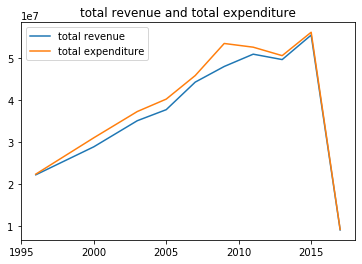

In [9]:
plt.plot(df_education_2.loc[df_education_2.STATE == "TEXAS", "YEAR"],
         df_education_2.loc[df_education_2.STATE == "TEXAS", "TOTAL_REVENUE"], label="total revenue")

plt.plot(df_education_2.loc[df_education_2.STATE == "TEXAS", "YEAR"],
         df_education_2.loc[df_education_2.STATE == "TEXAS", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()
plt.show()

# It seems that expenditures tended to out-pace revenue, with a significant surge around 2008-2009, until around 2012.
# The jump in expenditures around 2008-2009 could represent the economic crisis of that time where the world economy was in
# a massive depression. If this did not happen, then it's possible that revenue could have tracked closer to expenditures.
# They fall very closer in line after this event, which could be the direct result of new regulations imposed.
# The sharp decline could represent a fall in total moneys but is more likely this is when data becomes incomplete due to 
# a gap in available reporting or scraping of the data.

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

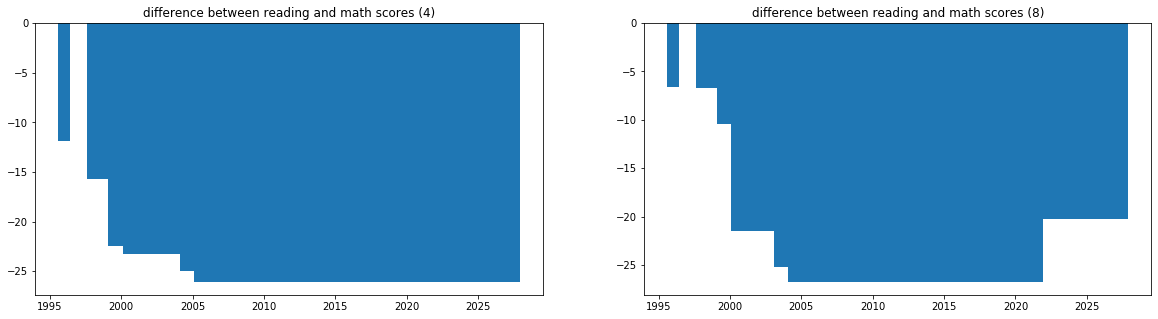

difference between reading and math scores (4)
252    -11.850907
460    -15.733788
616    -22.497916
719    -23.257092
824    -22.735447
932    -21.606351
1036   -22.780949
1140   -25.016692
1242   -26.059559
1484   -26.065177
dtype: float64
difference between reading and math scores (8)
252     -6.607836
460     -6.755989
616    -10.486543
719    -21.471485
824    -20.160498
932    -15.984540
1036   -25.227153
1140   -26.749917
1242   -16.713675
1484   -20.273657
dtype: float64


In [13]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(df_education_2.loc[df_education_2.STATE == "TEXAS", "YEAR"],
         df_education_2.loc[df_education_2.STATE == "TEXAS", "AVG_READING_4_SCORE"] - df_education_2.loc[df_education_2.STATE == "TEXAS", "AVG_MATH_4_SCORE"])

plt.title("difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(df_education_2.loc[df_education_2.STATE == "TEXAS", "YEAR"],
        df_education_2.loc[df_education_2.STATE == "TEXAS", "AVG_READING_8_SCORE"] - df_education_2.loc[df_education_2.STATE == "TEXAS", "AVG_MATH_8_SCORE"])

plt.title("difference between reading and math scores (8)")

plt.show()

print("difference between reading and math scores (4)")
print(df_education_2.loc[df_education_2.STATE == "TEXAS", "AVG_READING_4_SCORE"] - df_education_2.loc[df_education_2.STATE == "TEXAS", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(df_education_2.loc[df_education_2.STATE == "TEXAS", "AVG_READING_8_SCORE"] - df_education_2.loc[df_education_2.STATE == "TEXAS", "AVG_MATH_8_SCORE"])

# It appears Texas students are better at math than reading

### 4. What are the distributions of the math and reading scores in the sample?

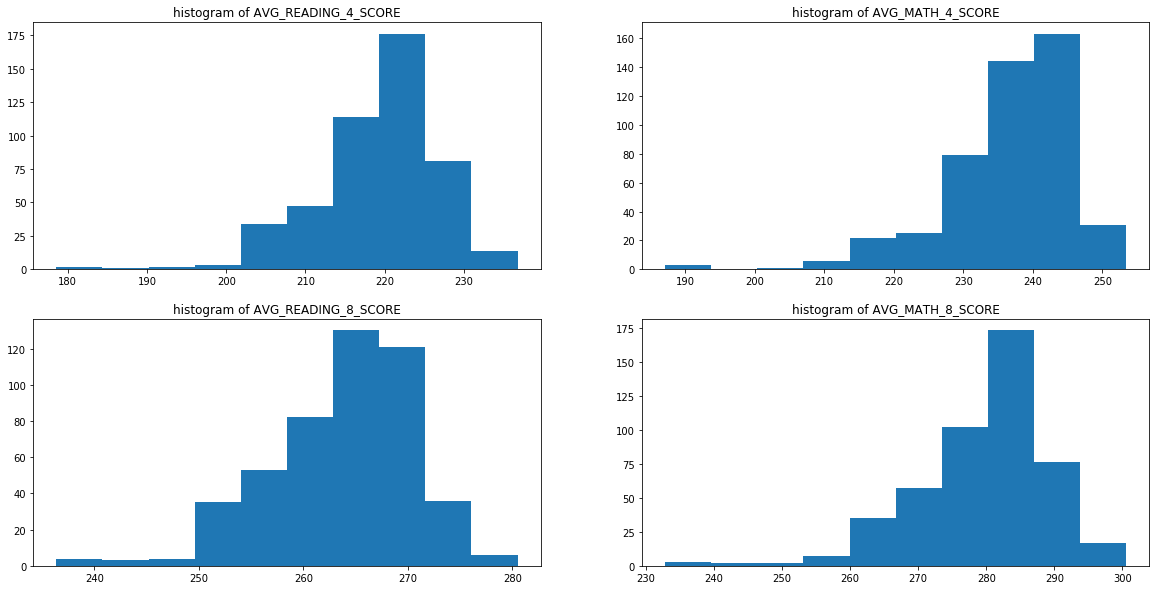

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(df_education_2.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(df_education_2.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(df_education_2.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(df_education_2.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

# both distributions are relatively normal, with the bulk of the population to the left.
# This could indicate lower than average scores, or those who perform higher than average have significantly higher scores, which could artifically skew the data.

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [16]:
# must go back to the sql table to do a fresh pull down because dropna was already applied.

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_education = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

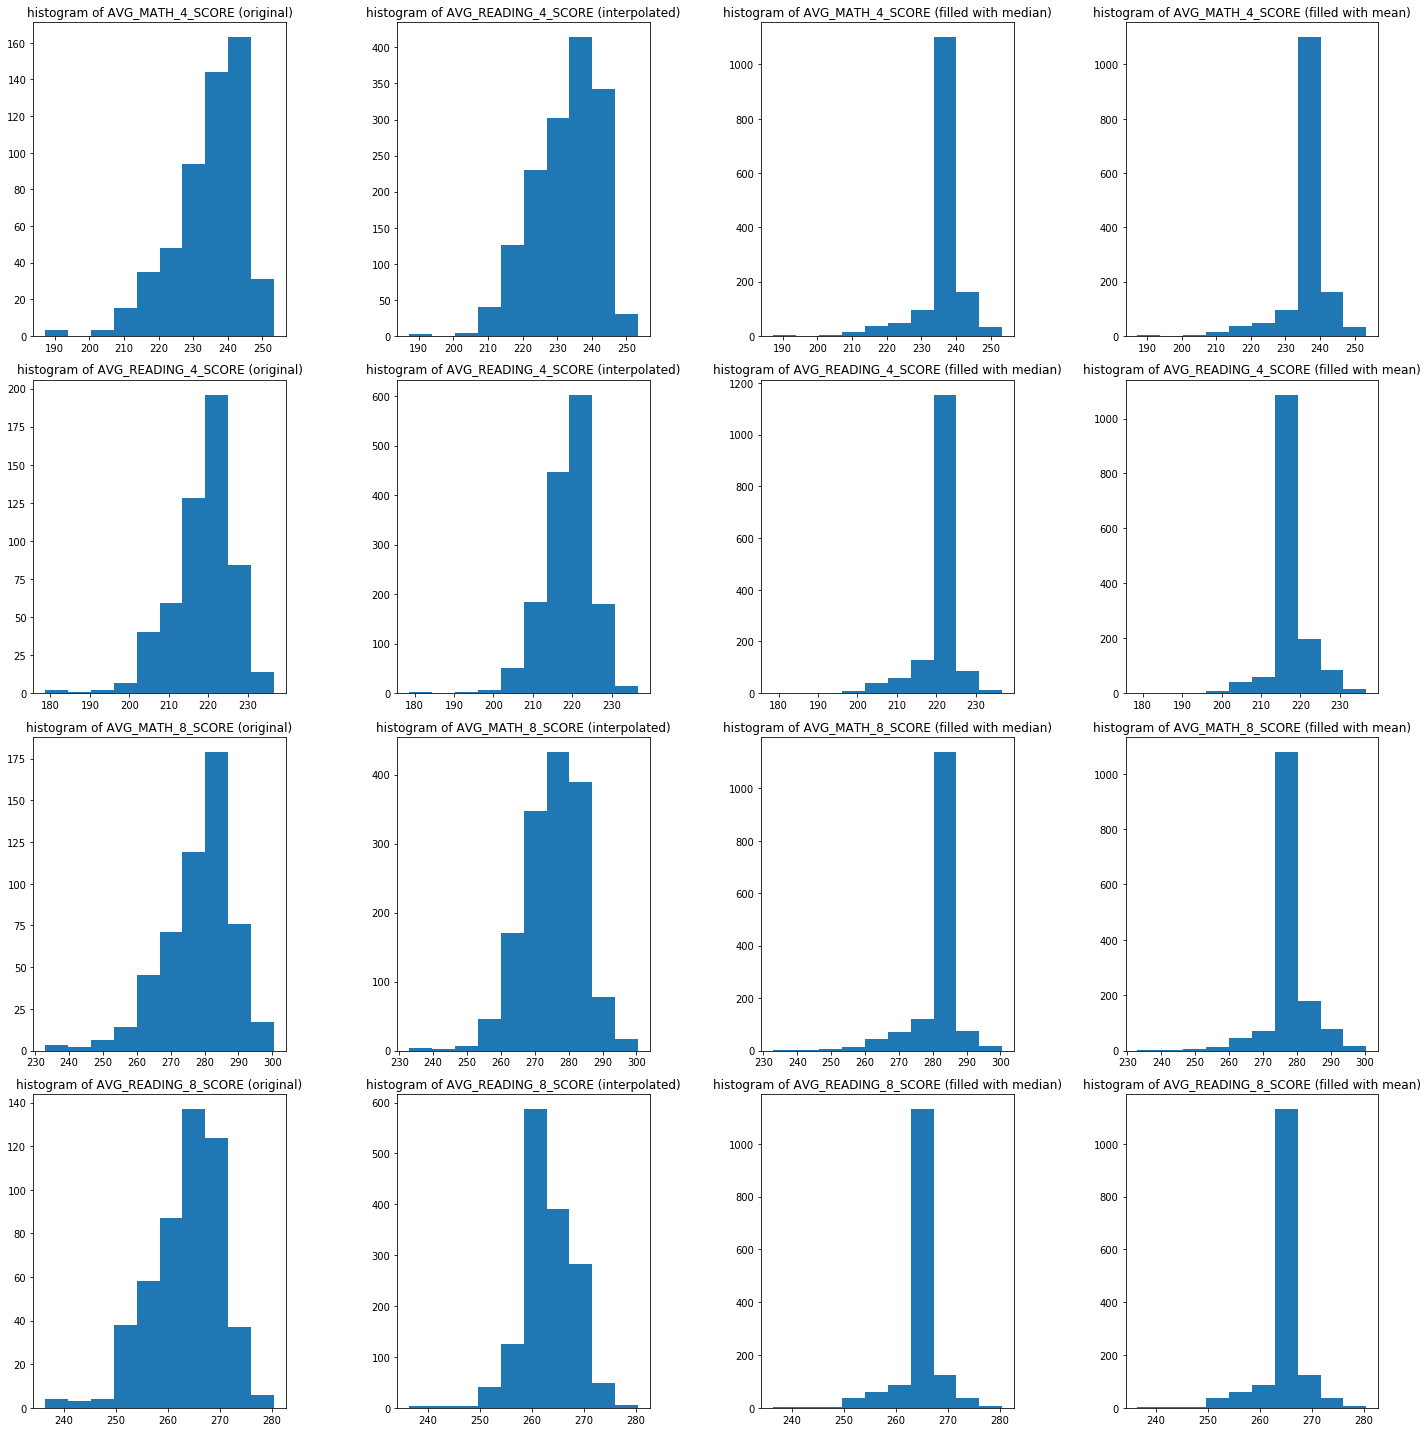

In [17]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df_education.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(df_education.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(df_education.AVG_MATH_4_SCORE.fillna(df_education.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(df_education.AVG_MATH_4_SCORE.fillna(df_education.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(df_education.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(df_education.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(df_education.AVG_READING_4_SCORE.fillna(df_education.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(df_education.AVG_READING_4_SCORE.fillna(df_education.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(df_education.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(df_education.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(df_education.AVG_MATH_8_SCORE.fillna(df_education.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(df_education.AVG_MATH_8_SCORE.fillna(df_education.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(df_education.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(df_education.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(df_education.AVG_READING_8_SCORE.fillna(df_education.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(df_education.AVG_READING_8_SCORE.fillna(df_education.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

It appears the number of nulls was significant due to the amount of change to the unique models and data types.
 median method very much skewed the data and drastically altered the distributions. 
 the interpolated method didn't impact the data as drastically. Cases could be made that the amount of nulls could
 swing the analysis/model and should be thrown out; or the interpolated method worked well enough and should be implemented.